### Problem statment
Regression: Simple Linear

Dataset: advertising.csv

Apply Data pre-processing (Label Encoding , Data Transformation….)
techniques if necessary.

Explore whether TV advertising spending can predict the number of sales for
the product. Also display the regression results and plot the
regression line

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
path = "../../all_datasets/Regression/advertising.csv"
data = pd.read_csv(path)

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.shape

(200, 4)

Visualizing data

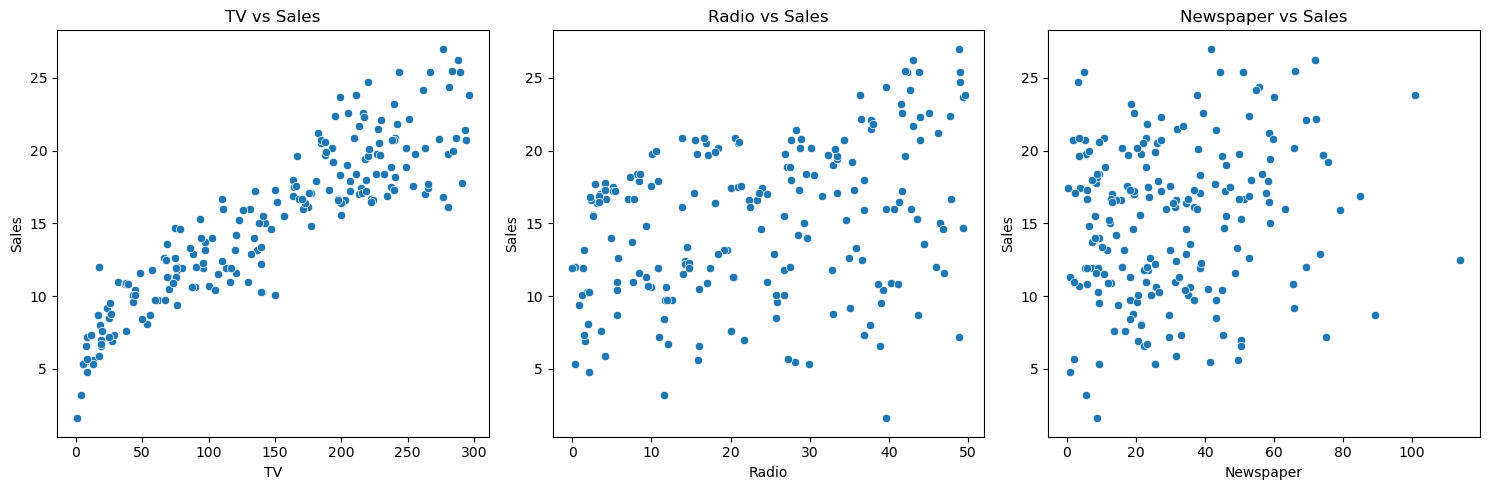

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for 'TV' vs 'Sales'
sns.scatterplot(x=data['TV'], y=data['Sales'], ax=axes[0])
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV vs Sales')

# Scatter plot for 'Radio' vs 'Sales'
sns.scatterplot(x=data['Radio'], y=data['Sales'], ax=axes[1])
axes[1].set_xlabel('Radio')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio vs Sales')

# Scatter plot for 'Newspaper' vs 'Sales'
sns.scatterplot(x=data['Newspaper'], y=data['Sales'], ax=axes[2])
axes[2].set_xlabel('Newspaper')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


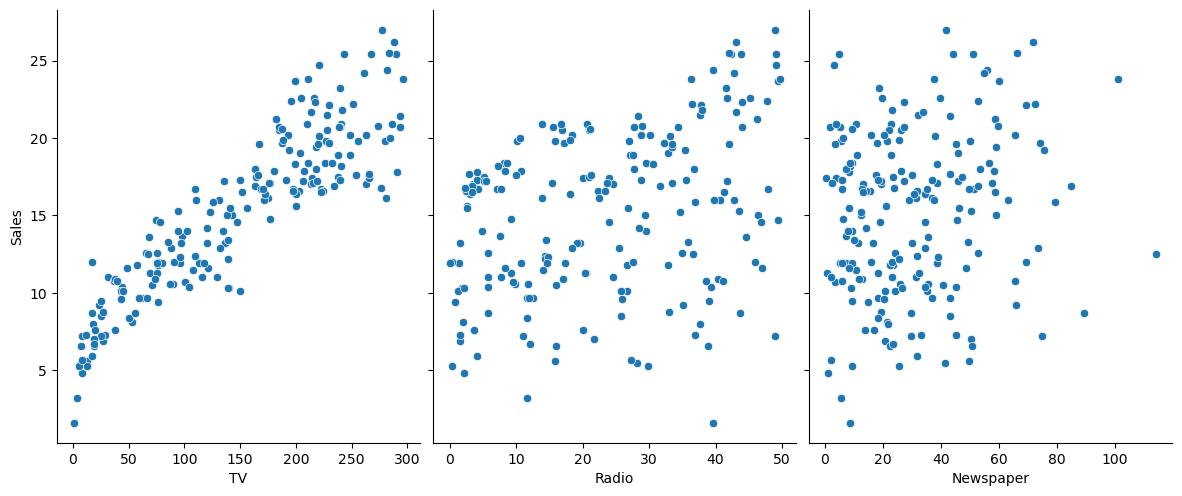

In [10]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8)
plt.show()

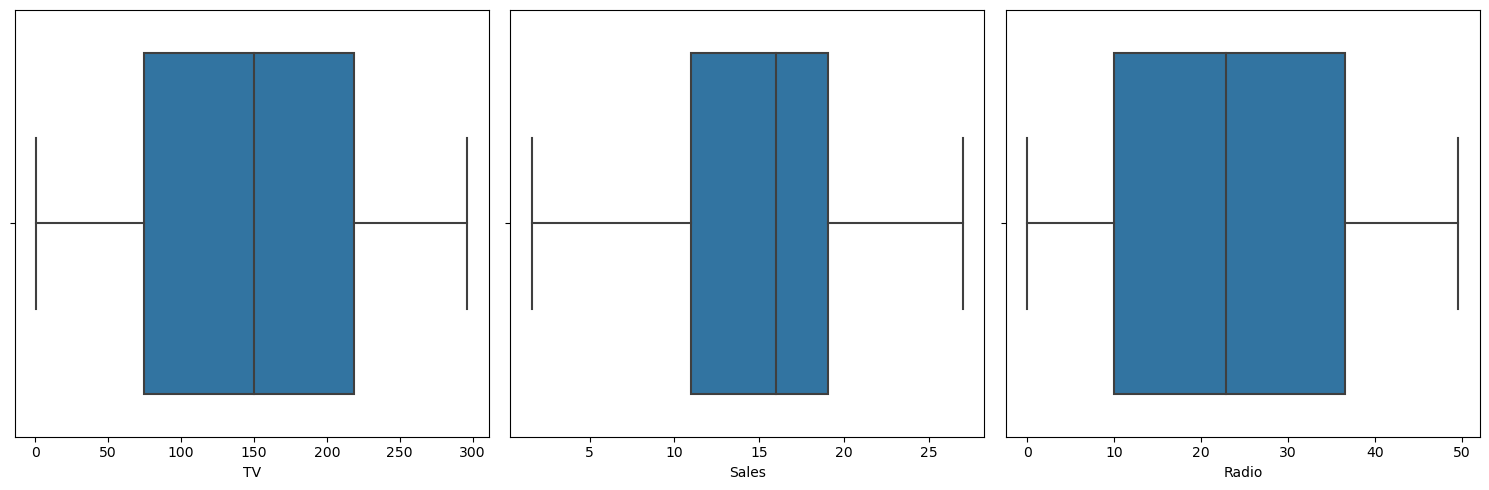

In [20]:
# Finding out outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=data['TV'], ax=axes[0])
sns.boxplot(x=data['Sales'], ax=axes[1])
sns.boxplot(x=data['Radio'], ax=axes[2])

plt.tight_layout()
plt.show()

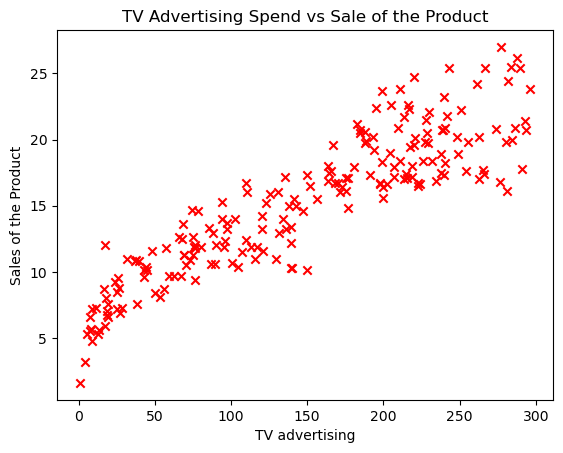

In [12]:
#as we can see there are no outliers in the data
#now lets visualize the data of tv advertise spending vs sale of the product
plt.scatter(data['TV'],data['Sales'], marker='x', c='r')
plt.title('TV Advertising Spend vs Sale of the Product')
plt.xlabel('TV advertising')
plt.ylabel('Sales of the Product')
plt.show()

In [21]:
# now the feature variable is tv and target variable is sales 

X = data[['TV']]
y = data['Sales']


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
#now train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
#making predictions
y_pred = model.predict(X_test)


In [27]:
from sklearn import metrics
coefficient = model.coef_
intercept = model.intercept_

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
r2score = metrics.r2_score(y_test,y_pred)
rss = ((y_test - y_pred)**2).sum()


# Display coefficients and intercept
print(f"Coefficients: {coefficient}")
print(f"Intercept: {intercept}")

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Residual Sum of Squares: {rss}")
print(f"R-Squared Score: {r2score}")

Coefficients: [0.05548294]
Intercept: 7.00710842824185
Mean Squared Error: 6.101072906773963
Mean Absolute Error: 1.9502948931650088
Residual Sum of Squares: 244.04291627095853
R-Squared Score: 0.802561303423698


In [28]:
model.score(X_test,y_test)


0.802561303423698

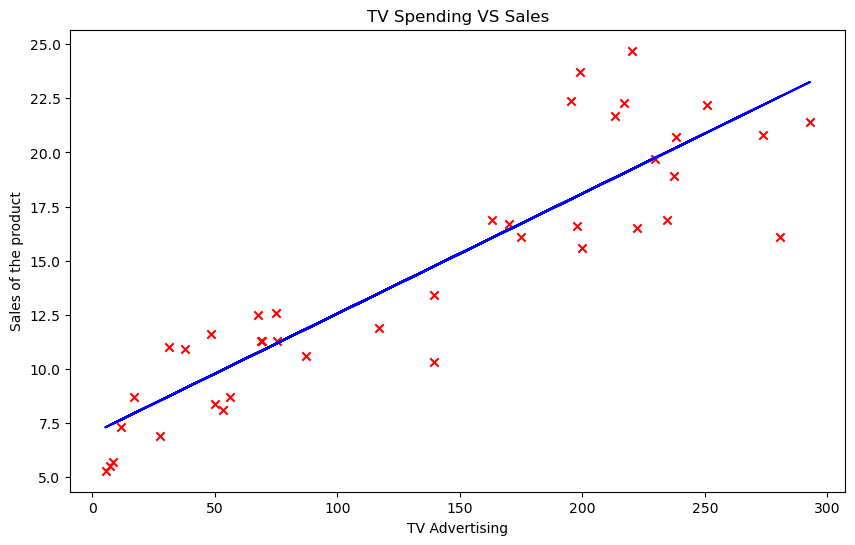

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test,color="r", marker='x')
plt.plot(X_test.values,y_pred,color="b")
plt.title("TV Spending VS Sales")
plt.xlabel("TV Advertising")
plt.ylabel("Sales of the product")
plt.show()